# Gaussian Classifier

The **pdf** (*probability density function*) of Multivariate Normal Distribution is defined as:

$$
\mathcal{N}(x|\mu, \Sigma) := \frac{1}{(2\pi)^{\frac{n}{2}} } exp\left( - \frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
$$

where **mean vector** $\mu$ and **covariance matrix** $\Sigma$ for 2-dimensional could be as following:

$$
\mu = \begin{bmatrix}
0\\
0\\
\end{bmatrix}
, \Sigma = \begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}
$$

Furthermore, $x$ can be defined as:

$$
x \sim \mathcal{N}(\mu,\,\Sigma)\,.
$$

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Median parameter
mu_x = 0
mu_y = 0

# Variance parameter
variance_x = 1
variance_y = 1

#Create grid and multivariate normal
x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
X, Y = np.meshgrid(x,y)

# # Pack X and Y into a single 3-dimensional array
pos = np.empty((X.shape[0], X.shape[1], 2))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# random variable
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])
Z = rv.pdf(pos)

## Visualization

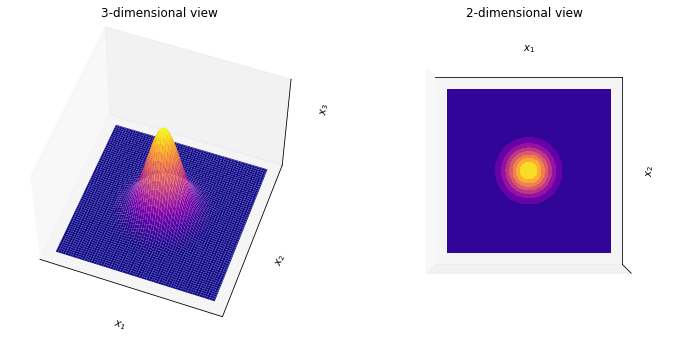

In [28]:
# plot using subplots
fig = plt.figure(figsize = (12, 8))

ax1 = fig.add_subplot(1, 2 , 1, projection='3d')
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0, antialiased=True, cmap=cm.plasma)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$x_3$')
ax1.set_title("3-dimensional view")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.plasma)
ax2.view_init(90, 270)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_title("2-dimensional view")

plt.show()

## Maximum Likelihood Estimate (MLE) of Mean and Variance
$ML$ := Maximum Likelihood

$$
\mu_{ML} = \frac{1}{N}\Sigma_i x_i
$$

$$
\Sigma_{ML} = \frac{1}{N}\Sigma_i^N (x_i - \bar{x})(x_i - \bar{x})^T
$$

## The Model

Let's traing a model with two classes (binary). Then, for a given $x$ we want to estimate $p(y=1|x)$ and $p(y=2|x)$. We can use Bayes theorem:

$$
p(y=c|x)=p(x|y=c) p(y=c)
$$


It is called Gaussian classifier due to the assumption that $p(x|y=X$ is a Gaussian distribution. It is also known as "Mixture Gaussian" and "Discriminant classifier"

In [143]:
class GaussianClassifier:
    # simple binary model
    
    def fit(self, X, y):
        
        # Class-conditional density - MLE Estimate
        self.mean_0 = np.average( X[y == 0], axis = 0)
        self.mean_1 = np.average( X[y == 1], axis = 0)
        self.sigma_0 = np.cov( X[y == 0], rowvar = False)
        self.sigma_1 = np.cov( X[y == 1], rowvar = False)
        
        # Class prior
        self.pi_0 = y[y==0].shape[0]/y.shape[0]
        self.pi_1 = 1 - self.pi_0
        
        # Multivariante class-conditional pdf
        self.prob_0 = multivariate_normal(self.mean_0, self.sigma_0, allow_singular = True)
        self.prob_1 = multivariate_normal(self.mean_1, self.sigma_1, allow_singular = True)
        
    def predict(self, X):
        preds = []
        
        for x in X:
            if self.prob_0.pdf(x) * self.pi_0 > self.prob_1.pdf(x) * self.pi_1:
                preds.append(0)
            else:
                preds.append(1)
                
        return np.array(preds)
            
        


## Training on Data

In [144]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [146]:
model = GaussianClassifier()
model.fit(X_train, y_train)

In [147]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

## Generative Model 

In [148]:
import pandas as pd
import seaborn as sns

data = load_breast_cancer()
X, y = data.data, data.target

x1 = X[:, 0].reshape(-1, 1)
x2 = X[:, 1].reshape(-1, 1)

df = pd.DataFrame(X[:, 0:2], columns = ["x1", "x2"])
df['class'] = y
df.head()

,x1,x2,class
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      569 non-null    float64
 1   x2      569 non-null    float64
 2   class   569 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 11.2 KB


In [158]:
X, y = df.drop(['class'], axis = 1).values, df['class'].values
               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

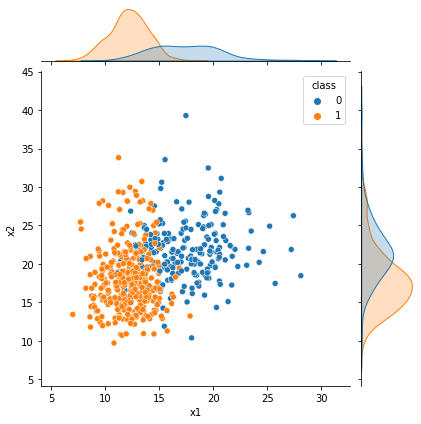

In [159]:
sns.jointplot(data = df, x="x1", y="x2", hue = "class")

In [160]:
model = GaussianClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9035087719298246

In [206]:
x = np.linspace((min(df['x1']),min(df['x2'])),(max(df['x1']),max(df['x2'])), 100)
test_1 = model.prob_0.pdf(x) * model.pi_0
test_2 = model.prob_1.pdf(x) * model.pi_1

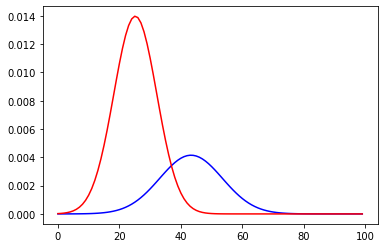

In [207]:
plt.plot(test_1, c = "b")
plt.plot(test_2, c = "r")

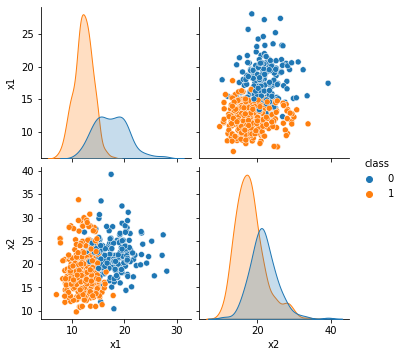

In [209]:
sns.pairplot(data = df, hue = "class")